In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import leastsq

week = 7

In [2]:
def plot_diff(i):
    plt.plot((alldata[3,i:]-alldata[3,:-(i)]))
    
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [3]:
data = pd.read_csv('us.csv', sep=',',header=0).values.transpose()
days = np.shape(data)[1]
weeks = days // week
indices = np.arange(days)
print(type(data))

<class 'numpy.ndarray'>


In [4]:
moredata = np.append(data, np.expand_dims(np.append(0, np.diff(data[1])), axis=0), axis=0)
alldata = np.append(moredata, np.expand_dims(np.append(0, np.diff(data[2])), axis=0), axis=0)

cases


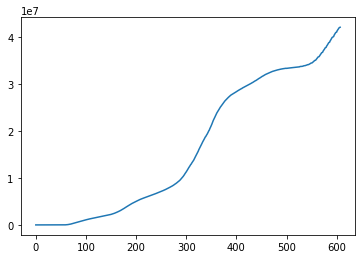

deaths


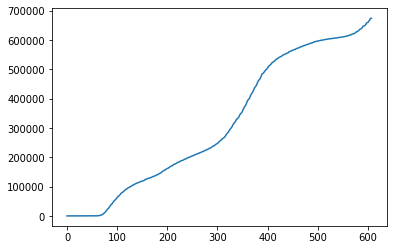

In [5]:
print("cases")
plt.plot(alldata[1])
plt.show()
print("deaths")
plt.plot(alldata[2])
plt.show()

In [6]:
avg_cases = np.convolve(alldata[3], np.ones((week,))/week, mode='valid')
act_cases = alldata[3,3:-3]
indices = np.arange(len(avg_cases))

In [7]:
num_weeks = len(avg_cases)
avg_diffs = np.convolve(avg_cases, np.ones((days,))/days, mode='valid')

In [8]:
avg_diffs

array([68668.43162593992, 68668.43162593992, 68668.43162593992,
       68668.43162593992, 68668.43162593992, 68668.43162593992,
       68668.43162593992], dtype=object)

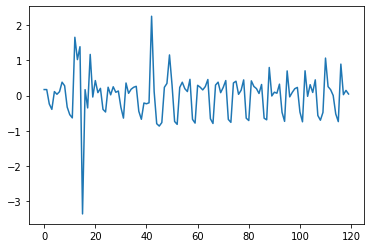

In [9]:
plt.plot(((act_cases-avg_cases)/avg_cases)[-120:])
plt.show()

cases per day
dX[t] = X[t]-X[t-1]


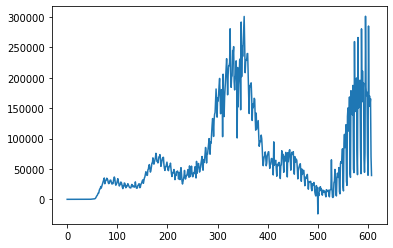

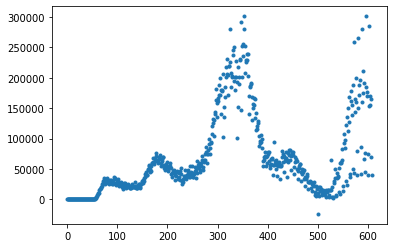

increase in daily cases week over week
ddX = dX[t]-dX[t-7]


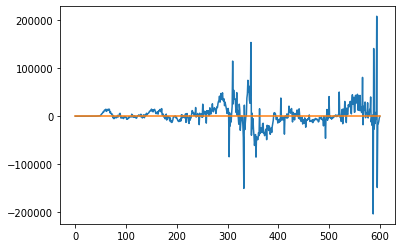

In [10]:
ignore = 83

print("cases per day")
print("dX[t] = X[t]-X[t-1]")
plt.plot(alldata[3])
plt.show()
plt.plot(np.arange(len(alldata[3])), alldata[3], '.')
plt.show()

# print("relative change in cases per day")
# print("dX/X = (X[t]-X[t-1])/X[t]")
# rel_new = alldata[3,1:]/alldata[1,:-1]
# rel_new[:ignore] = 0
# plt.plot(rel_new)
# plt.show()

ignore = 64

print("increase in daily cases week over week")
print("ddX = dX[t]-dX[t-7]")
weekly = (alldata[3,7:]-alldata[3,:-7])[:]
plt.plot(weekly)
plt.plot(np.zeros(len(weekly)))
plt.show()

# print("relative increase in daily cases per week")
# print("ddX/dX = (dX[t]-dX[t-7])/dX[t-7]")
# diff_ratio = (alldata[3,ignore+7:]-alldata[3,ignore:-7])/alldata[3,ignore:-7]
# plt.plot(np.append(np.zeros(ignore),diff_ratio))
# plt.show()

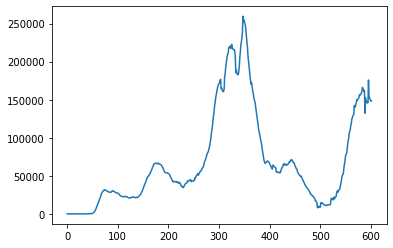

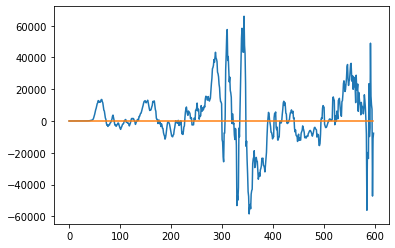

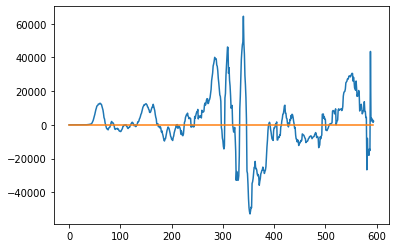

In [11]:
week_diff = alldata[3,7:]-alldata[3,:-7]
week_avg  = running_mean(alldata[3],7)

plt.plot(week_avg)
plt.show()
# plt.plot(week_avg[1:]-week_avg[:-1])
# plt.show()

avg = 4
plt.plot(running_mean(week_diff, avg))
plt.plot(np.zeros(len(week_diff)-avg))
plt.show()
# plt.plot(running_mean(diff_ratio, avg))
# plt.show()

avg = 7
plt.plot(running_mean(week_diff, avg))
plt.plot(np.zeros(len(week_diff)-avg))
plt.show()
# plt.plot(running_mean(diff_ratio, avg))
# plt.show()

Days of the week


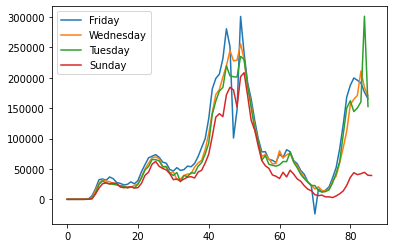

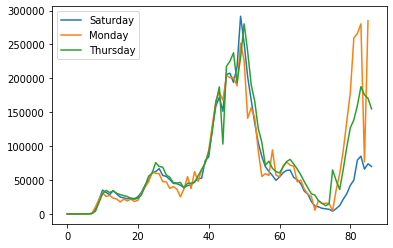

In [12]:
print("Days of the week")
plt.plot(alldata[3][10::7], label="Friday")
plt.plot(alldata[3][8::7], label="Wednesday")
plt.plot(alldata[3][7::7], label="Tuesday")
plt.plot(alldata[3][5::7], label="Sunday")
plt.legend()
plt.show()
plt.plot(alldata[3][4::7], label="Saturday")
plt.plot(alldata[3][6::7], label="Monday")
plt.plot(alldata[3][2::7], label="Thursday")
plt.legend()
plt.show()

In [13]:
print(alldata[3][-10:])

[176316 73926 39558 285058 152696 170109 154897 165465 69983 39203]


In [14]:
windowed = rolling_window(alldata[3], week)

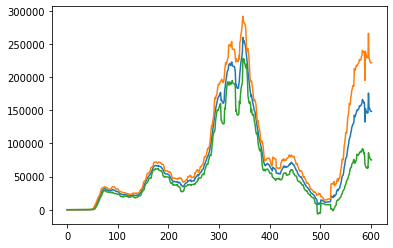

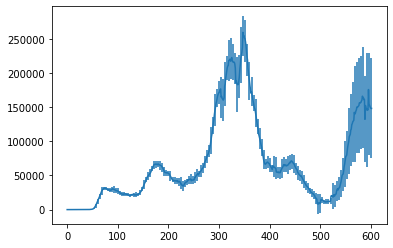

In [15]:
mean = np.mean(windowed, -1)
stdd = np.std(windowed, axis=-1, dtype=np.float64)
plt.plot(mean)
plt.plot(mean + stdd)
plt.plot(mean - stdd)
plt.show()
plt.errorbar(np.arange(len(mean)), mean, stdd, errorevery=4)
plt.show()

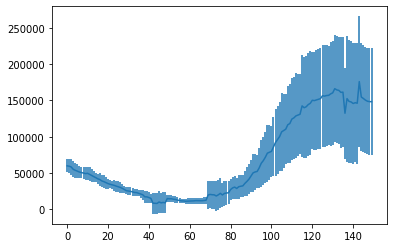

In [16]:
window = 150
plt.errorbar(np.arange(window), mean[-window:], stdd[-window:])
plt.show()

In [17]:
np.version.version

'1.19.4'